In [1]:
import numpy as np
np.seterr(all='ignore')
from networks import simple_network
from utils import *
simple_hyperparameters = {'N_train' : 1000, #size of training dataset 
                          'N_test' : 100, #size of test set x
                          'lr' : 0.001, #SGD learning rate 
                          'epochs' : 10, #training epochs
                          'batch_size' : 10,  #batch size (large will probably fail)           
                          'context_location' : 'start',  #where the feed in the task context 'start' vs 'end'
                          'train_mode' : 'random', #training mode 'random' vs 'replay' 
                          'second_task' : 'prod', #first task adds x+y, second task 'prod' = xy or 'add1.5' = x+1.5y
                          'fraction' : 0.50, #fraction of training data for tasks 1 vs task 2
                          'hidden_size' : 50, #hidden layer width
                          'rule1_grad' : 0,
                          'rule2_grad' : 1}

simple_model = simple_network(simple_hyperparameters)

/nfs/nhome/live/lhollingsworth/miniconda3/envs/ModNet/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([[-0.9468,  0.7537],
        [ 0.7640,  0.8087],
        [-0.4174,  0.7840],
        [-0.2579, -0.0385],
        [ 0.1034,  0.1412],
        [ 0.8378, -0.5004],
        [ 0.0425,  0.8431],
        [ 0.0920,  0.4253],
        [-0.7009, -0.3091],
        [-0.9257,  0.1557],
        [ 0.1471, -0.4668],
        [ 0.9424, -0.6861],
        [ 0.2143, -0.1087],
        [ 0.8064, -0.7528],
        [ 0.2471,  0.1748],
        [-0.3474, -0.9157],
        [-0.8277,  0.0531],
        [-0.4774, -0.4229],
        [ 0.2187,  0.1963],
        [-0.5611, -0.6878],
        [-0.8701, -0.0726],
        [ 0.5636, -0.8401],
        [ 0.5803,  0.6710],
        [ 0.3765,  0.6387],
        [-0.9683,  0.5096],
        [-0.9837,  0.2456],
        [ 0.6224, -0.2827],
        [-0.5681, -0.5002],
        [-0.1606,  0.6053],
        [ 0.7418, -0.3864],
        [ 0.2037,  0.6347],
        [-0.1832,  0.0444],
        [-0.0526,  0.6273],
        [ 0.5272, -0.2057],
        [-0.7949, -0.6308],
        [-0.2174, -0

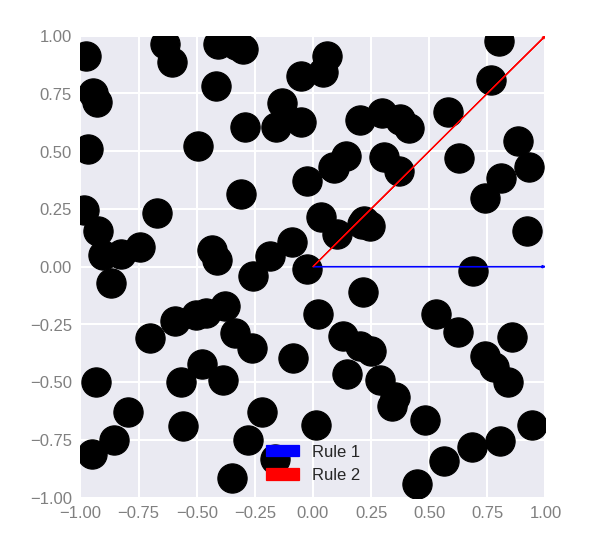

In [9]:
rule1, rule2 = simple_model.rules()
plot_rulespace(list(rule1[0]), list(rule2[0]), simple_model.x1_test[:,:2])

Model: 100%|██████████| 100/100 [04:12<00:00,  2.53s/it]


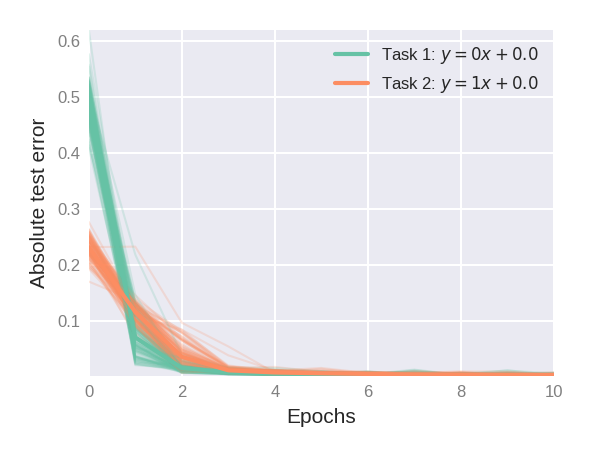

In [3]:
N_models = 100
models1 = train_multiple('simple_network', simple_hyperparameters, N_models = N_models)
plot_training(models1)


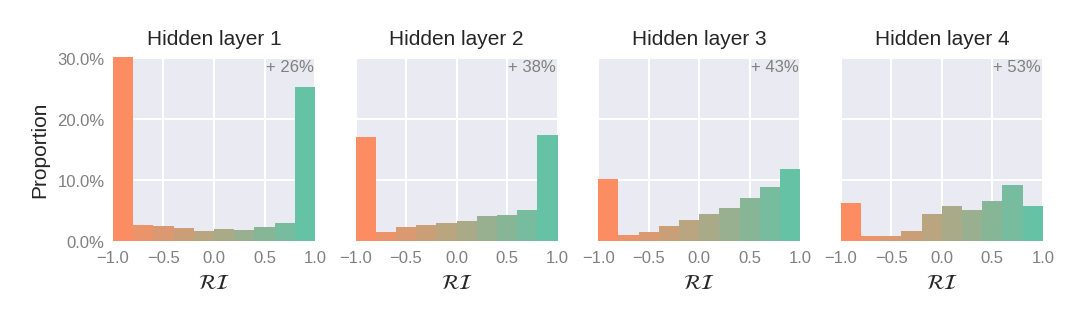

In [4]:
plot_RI(models1)

Gradient of r2 =  1000.0


Model: 100%|██████████| 20/20 [00:47<00:00,  2.38s/it]


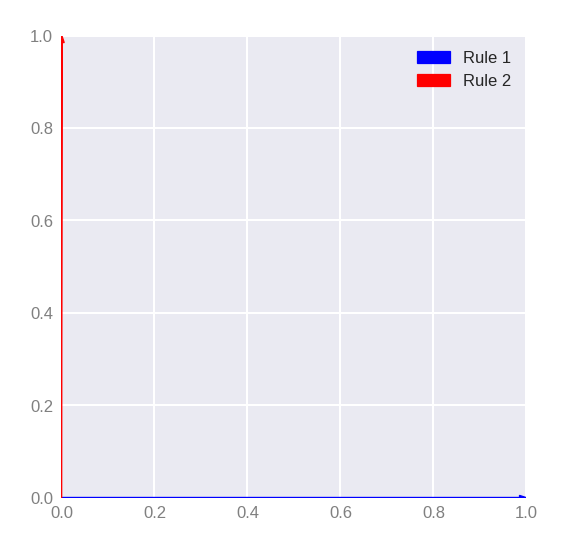

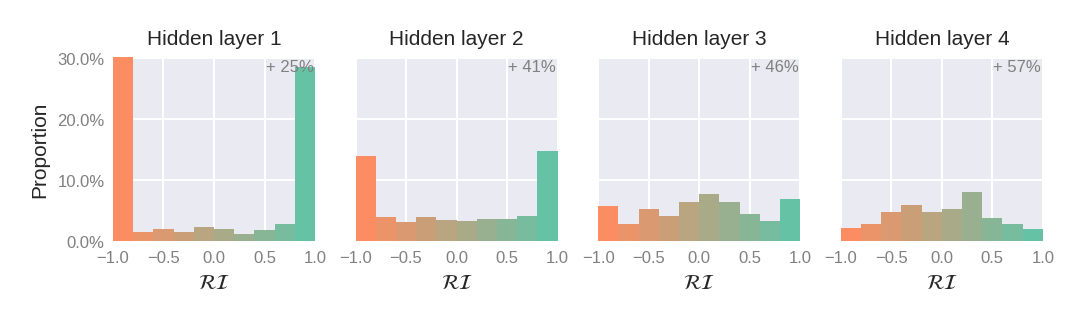

Gradient of r2 =  5.0


Model: 100%|██████████| 20/20 [00:54<00:00,  2.74s/it]


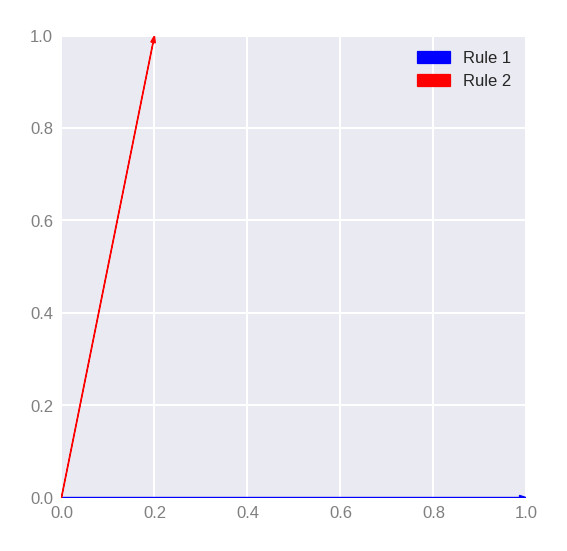

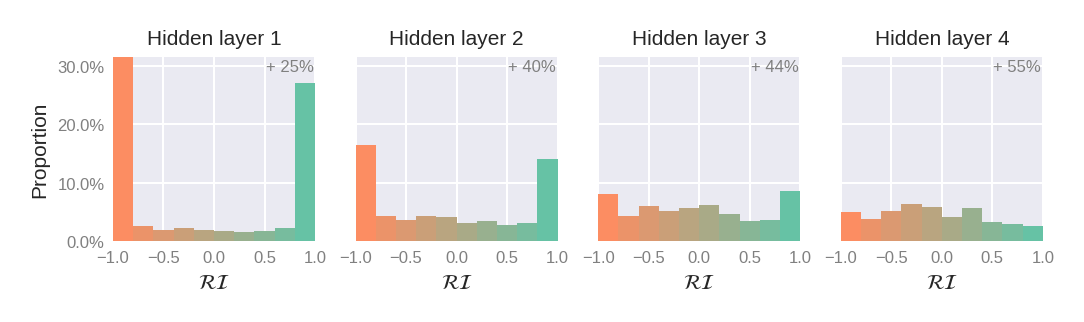

Gradient of r2 =  3.333333333333333


Model: 100%|██████████| 20/20 [00:42<00:00,  2.11s/it]


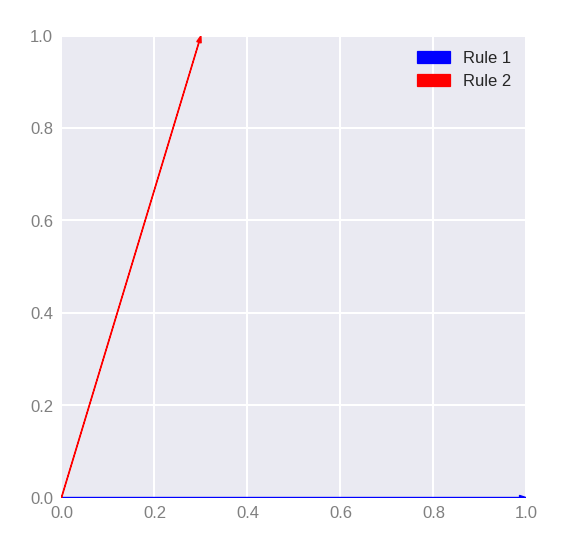

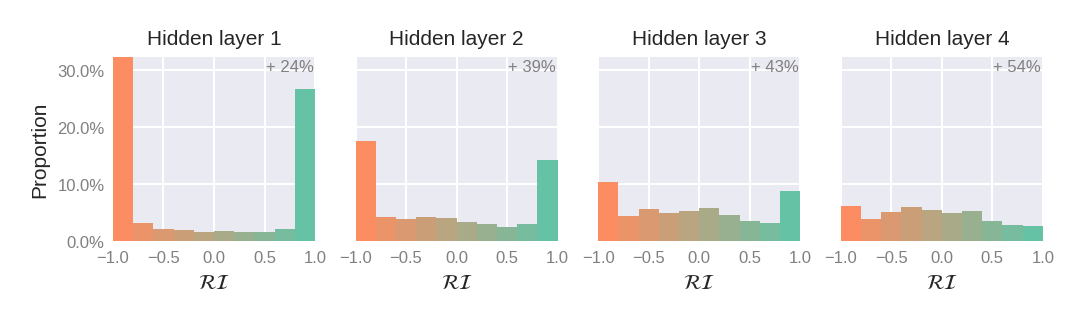

Gradient of r2 =  2.5


Model: 100%|██████████| 20/20 [00:50<00:00,  2.51s/it]


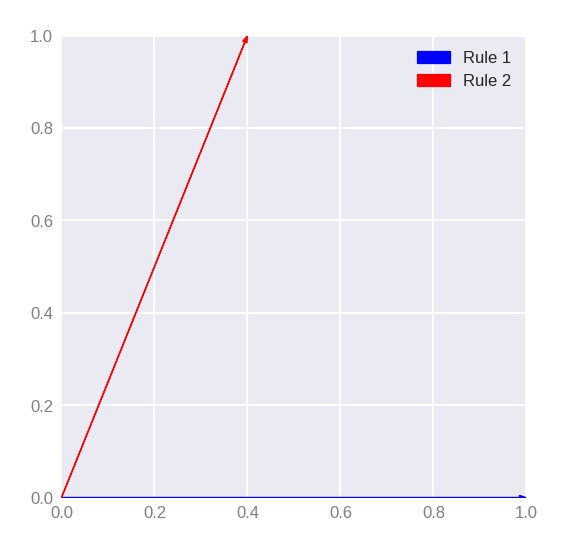

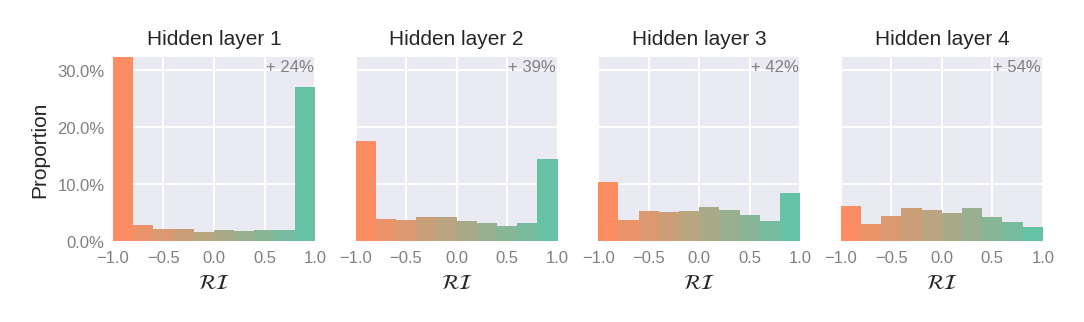

Gradient of r2 =  2.0


Model: 100%|██████████| 20/20 [00:45<00:00,  2.27s/it]


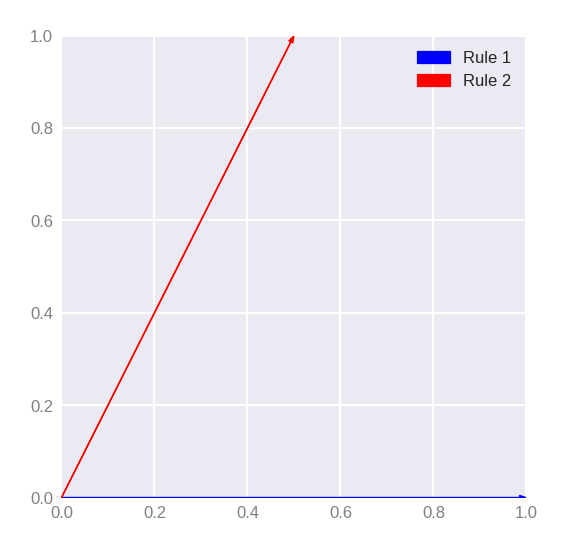

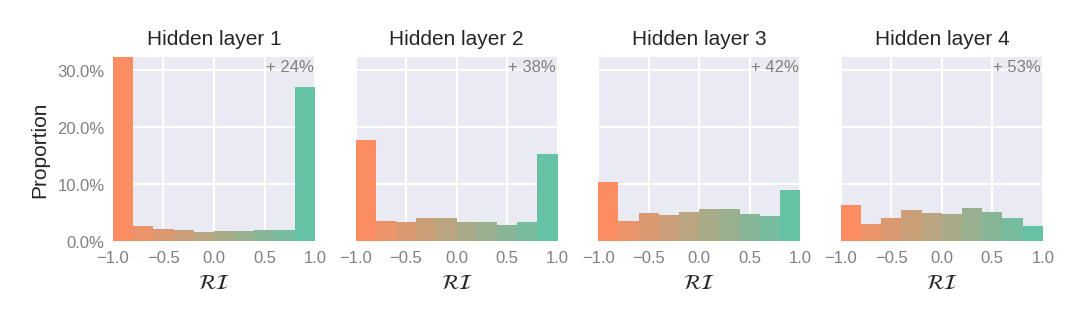

Gradient of r2 =  1.6666666666666665


Model: 100%|██████████| 20/20 [00:50<00:00,  2.51s/it]


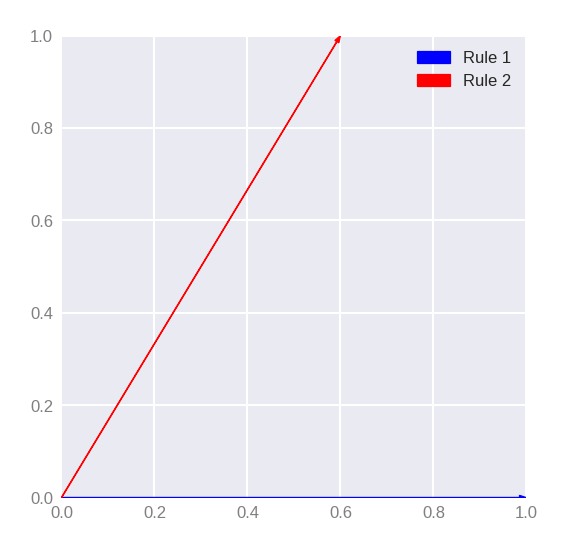

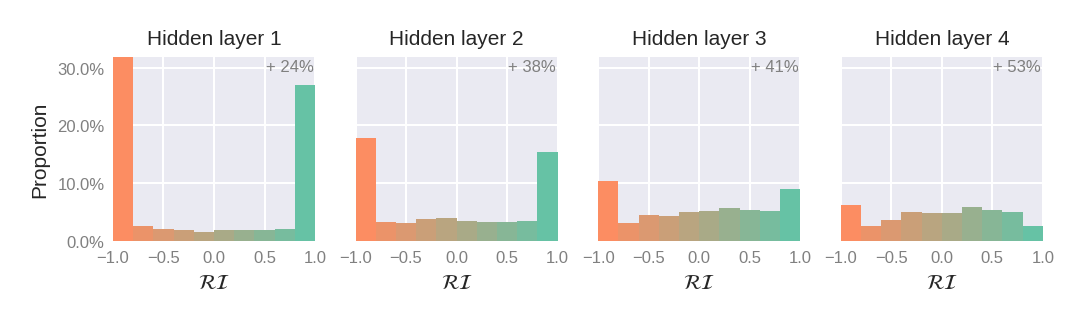

Gradient of r2 =  1.4285714285714286


Model: 100%|██████████| 20/20 [00:48<00:00,  2.44s/it]


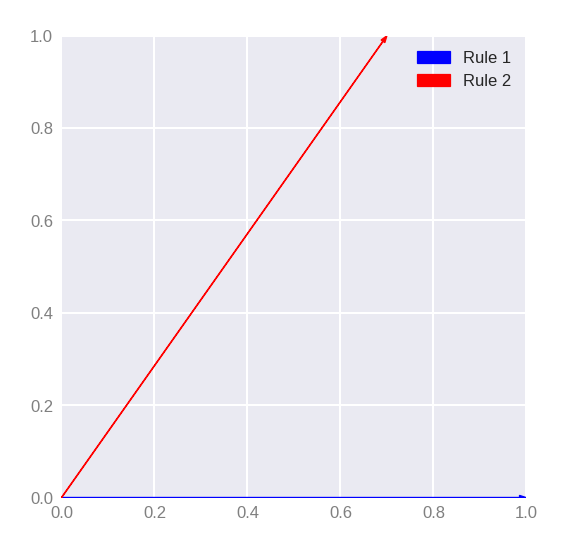

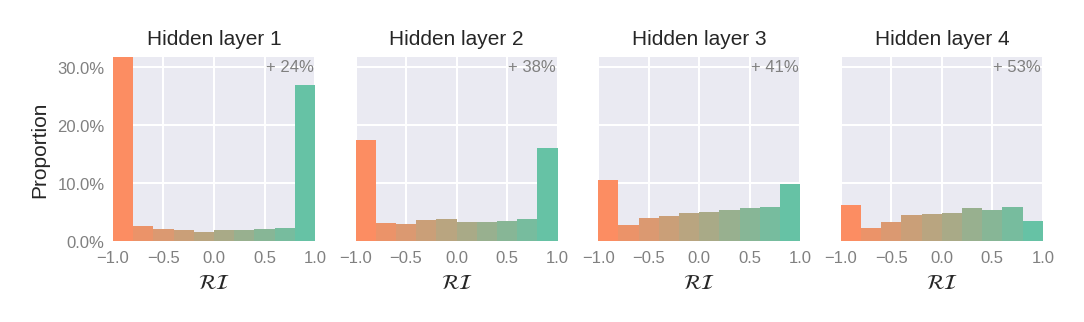

Gradient of r2 =  1.25


Model: 100%|██████████| 20/20 [00:51<00:00,  2.55s/it]


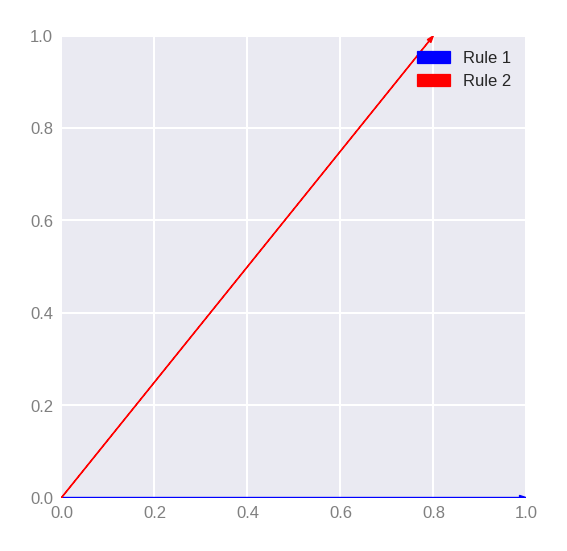

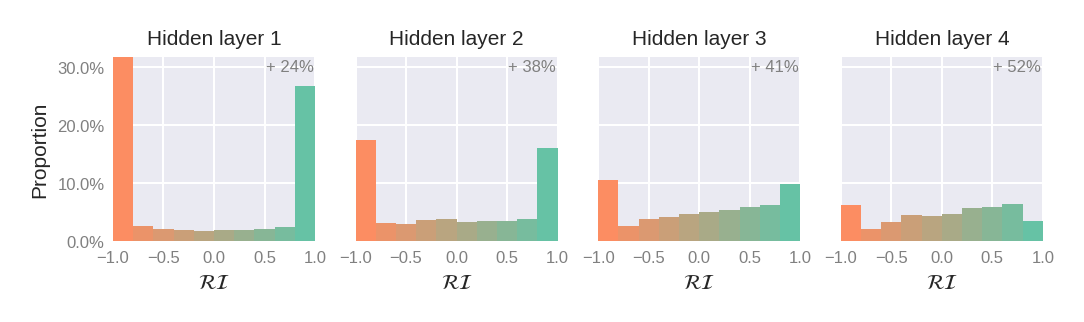

Gradient of r2 =  1.111111111111111


Model: 100%|██████████| 20/20 [00:45<00:00,  2.29s/it]


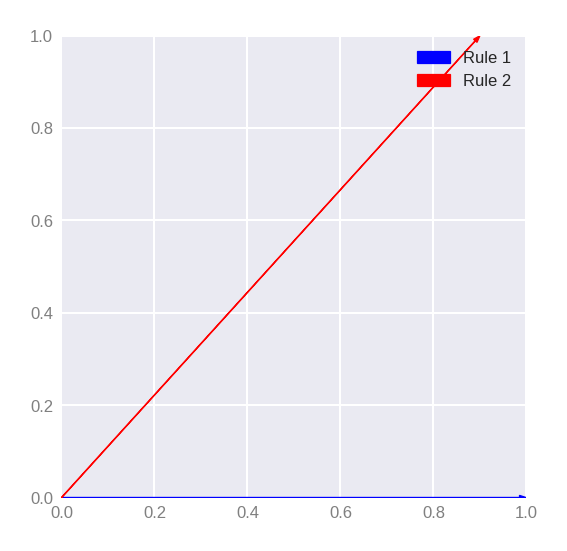

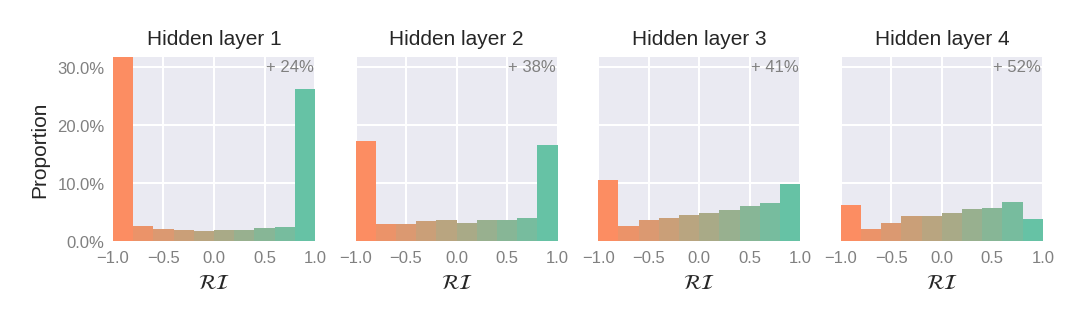

Gradient of r2 =  1.0


Model: 100%|██████████| 20/20 [00:52<00:00,  2.63s/it]


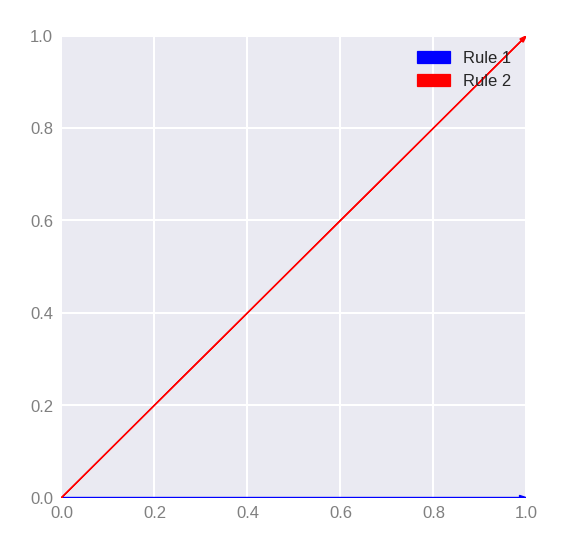

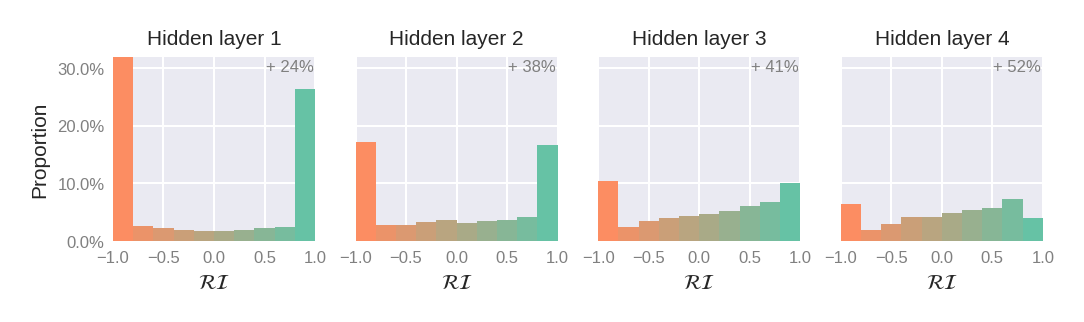

Gradient of r2 =  0.9000000000000001


Model: 100%|██████████| 20/20 [01:03<00:00,  3.16s/it]


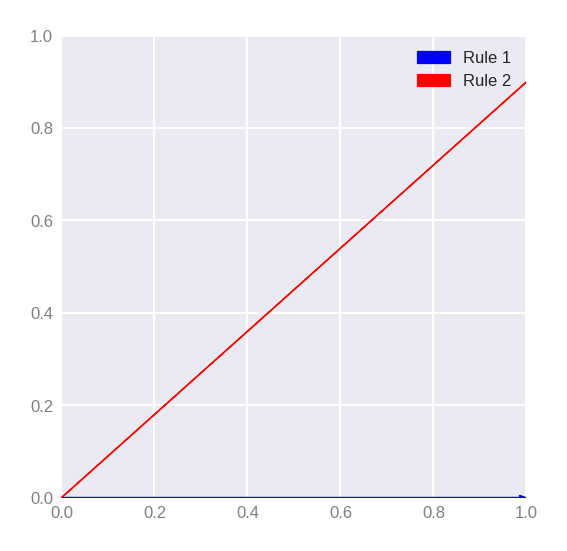

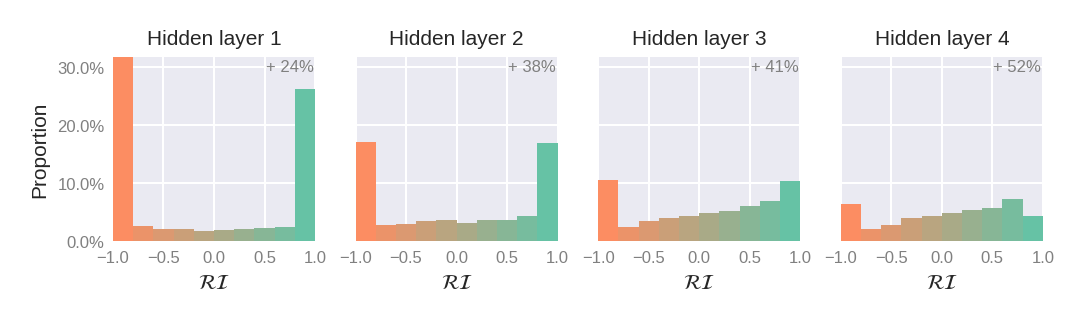

Gradient of r2 =  0.8


Model: 100%|██████████| 20/20 [00:46<00:00,  2.31s/it]


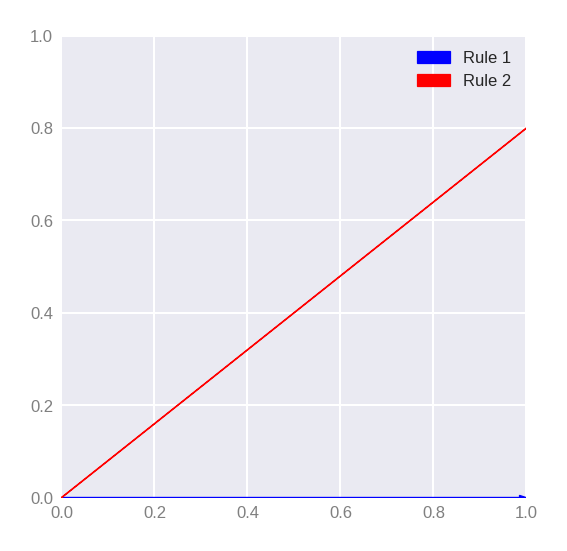

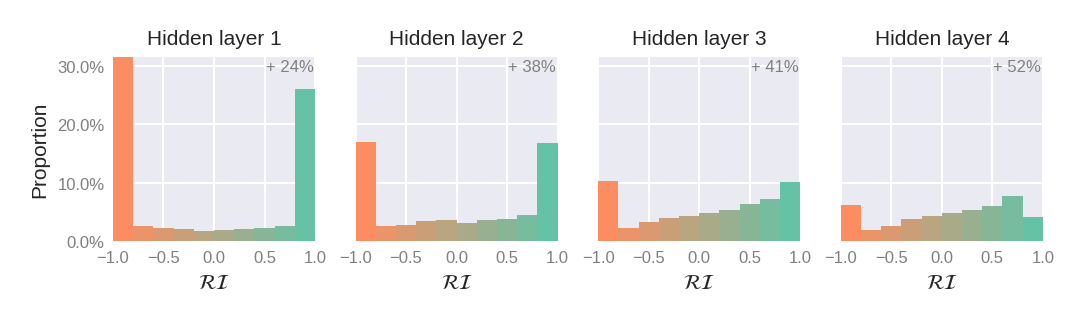

Gradient of r2 =  0.7


Model: 100%|██████████| 20/20 [00:44<00:00,  2.21s/it]


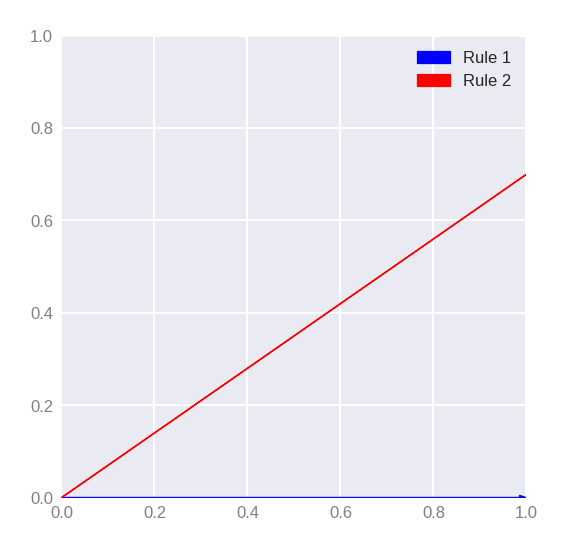

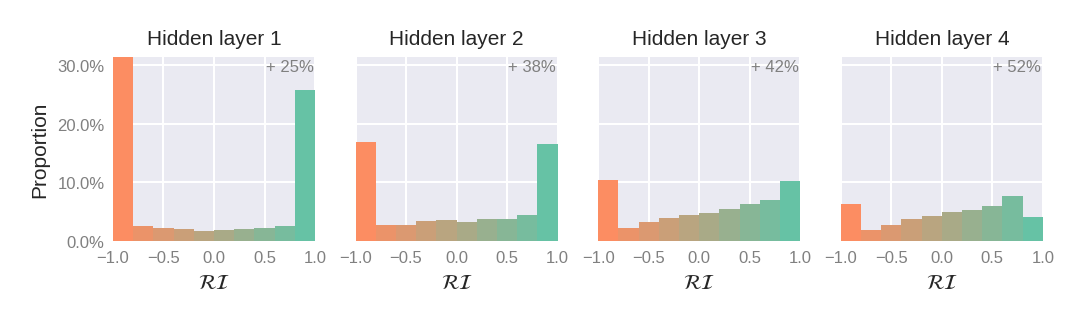

Gradient of r2 =  0.6000000000000001


Model: 100%|██████████| 20/20 [00:51<00:00,  2.56s/it]


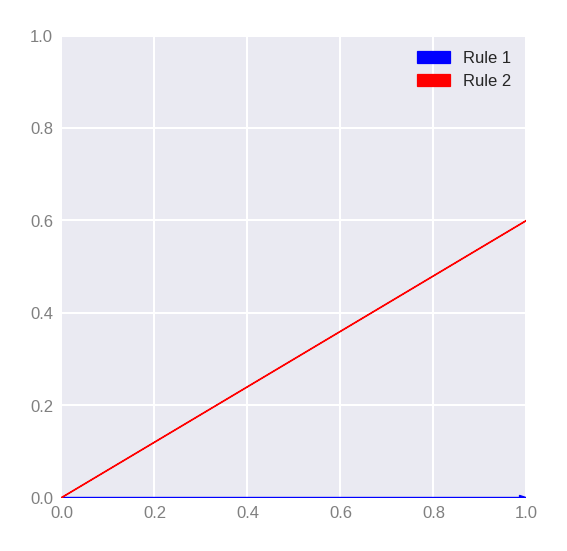

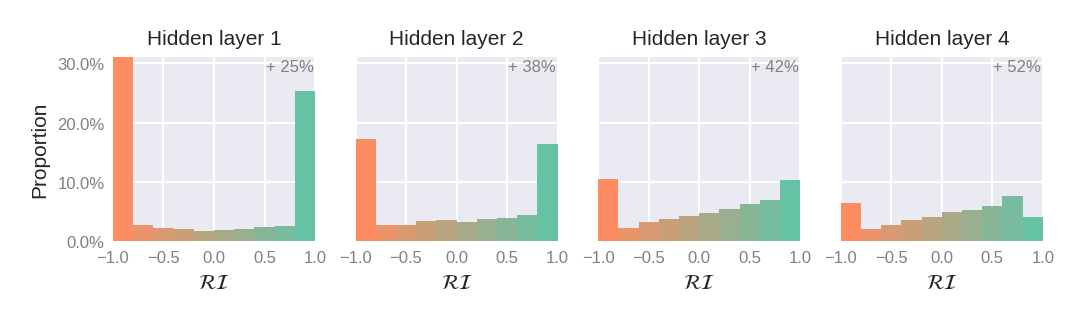

Gradient of r2 =  0.5


Model: 100%|██████████| 20/20 [00:49<00:00,  2.47s/it]


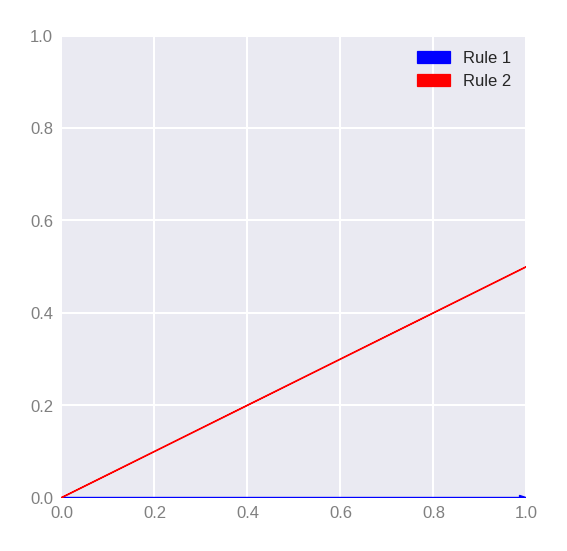

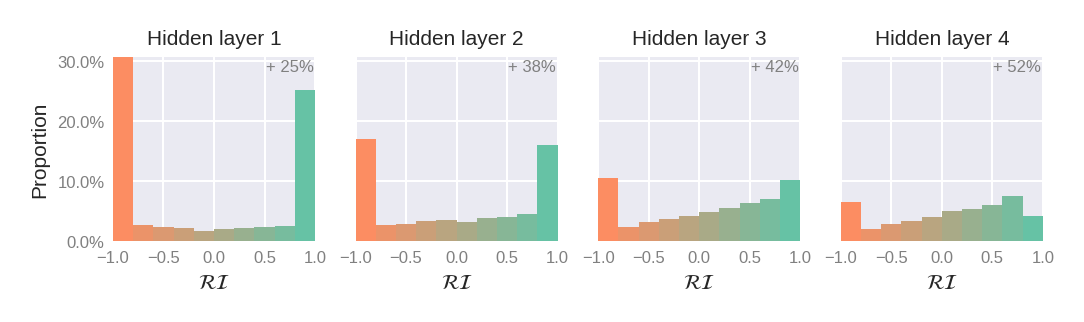

Gradient of r2 =  0.4


Model: 100%|██████████| 20/20 [00:49<00:00,  2.46s/it]


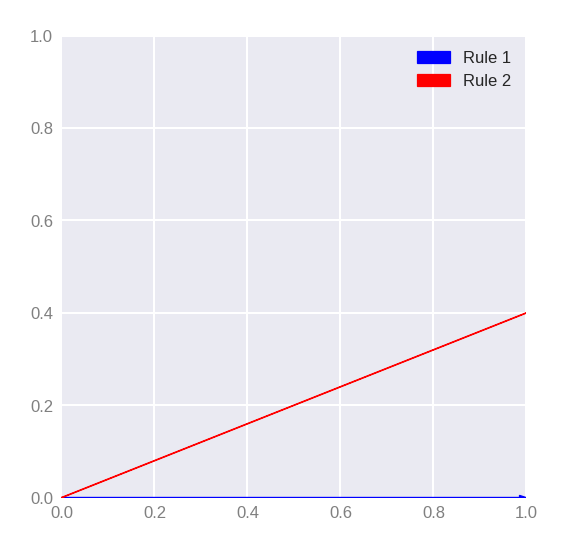

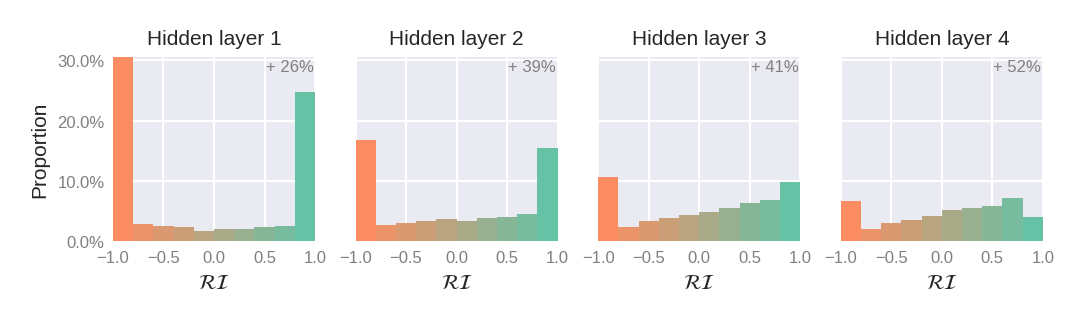

Gradient of r2 =  0.30000000000000004


Model: 100%|██████████| 20/20 [00:47<00:00,  2.37s/it]


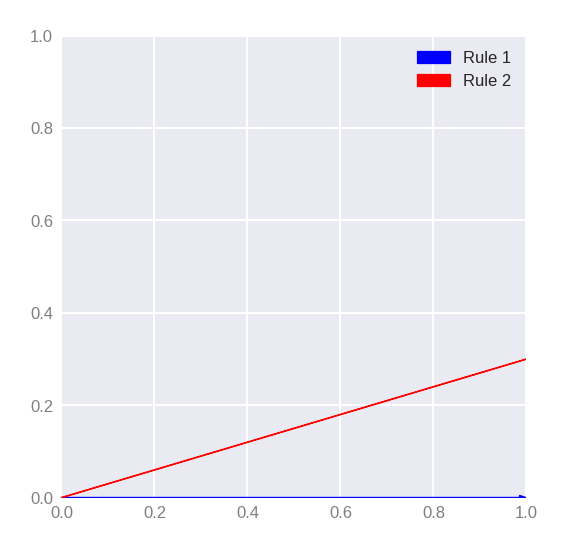

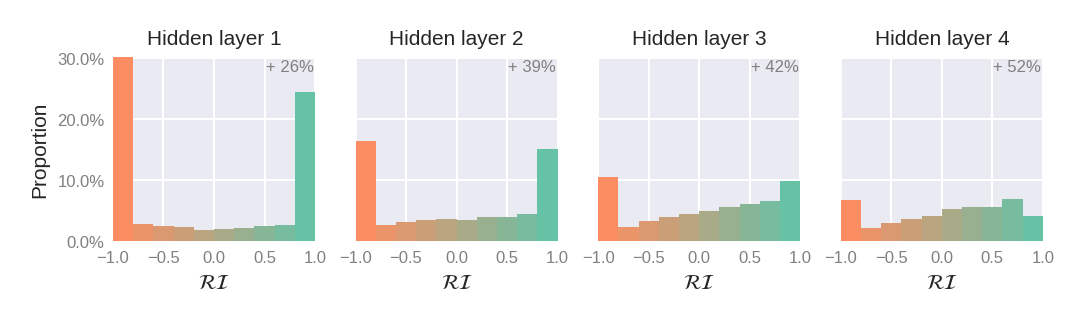

Gradient of r2 =  0.2


Model: 100%|██████████| 20/20 [00:45<00:00,  2.29s/it]


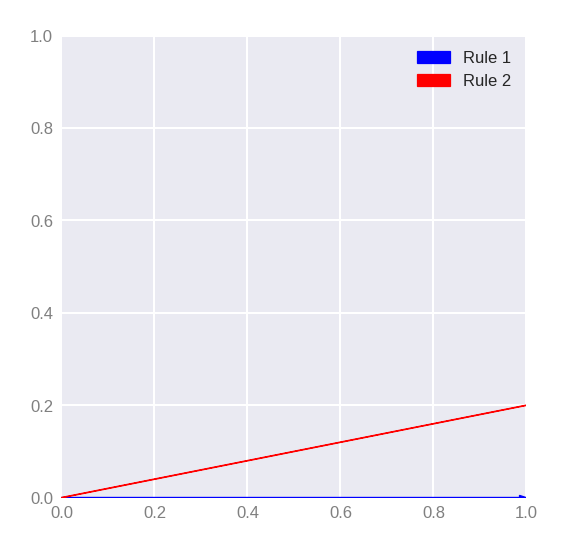

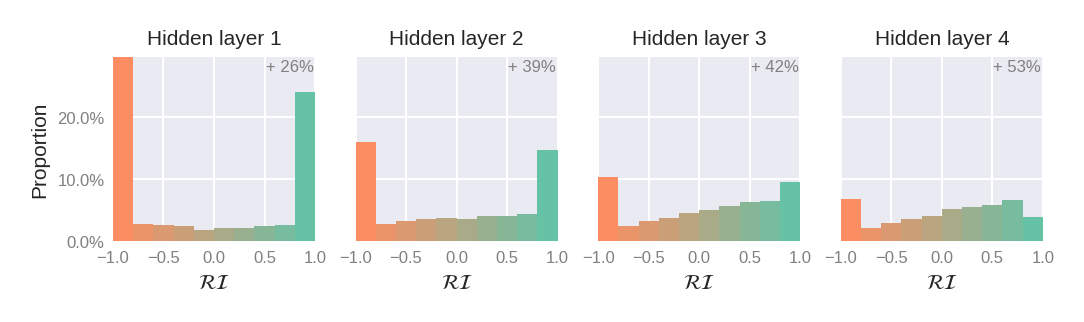

Gradient of r2 =  0.001


Model: 100%|██████████| 20/20 [00:56<00:00,  2.85s/it]


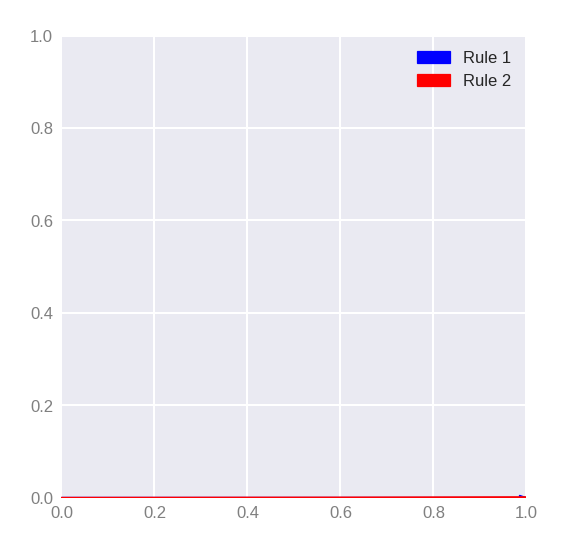

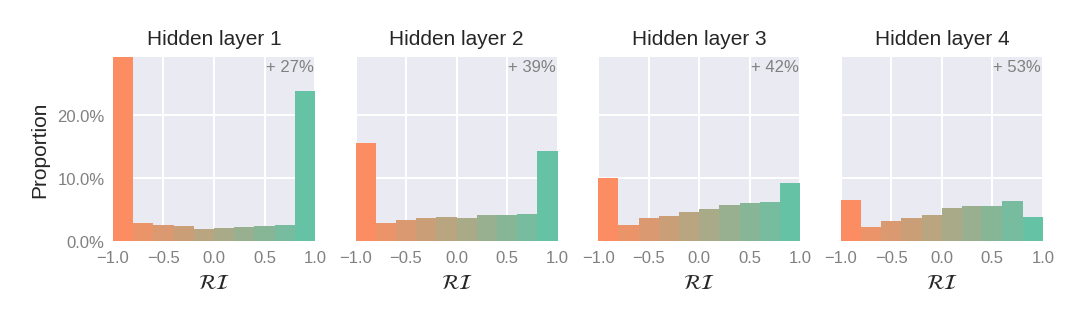

In [5]:
theta_variation(model_class='simple_network')

Model: 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


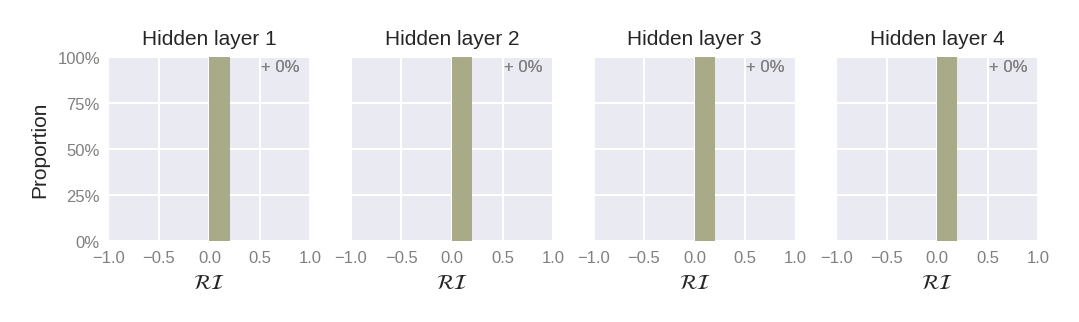

In [6]:
N_models = 1
models1 = train_multiple('simple_network', simple_hyperparameters, N_models = N_models)
plot_I(models1)